<a href="https://colab.research.google.com/github/jellyho/AI_Learning_jellyho/blob/main/2_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사이킷런을 사용해서 더 쉽게 모델 만들기

In [ ]:
from sklearn import datasets
import numpy as np

붓꽃 데이터셋 불러오기

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('label', np.unique(y))

label [0 1 2]


훈련셋, 테스트셋 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

데이터 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

퍼셉트론 불러오기

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

결정경계 시각화 함수(테스트 셋은 동그라미로 부각)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
  
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o',s=100,label='test set')

퍼셉트론으로 OvR방식을 통해 분류!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


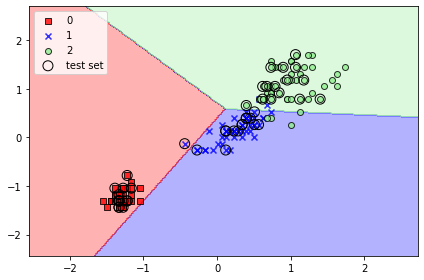

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()